In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from csbms import MultiClassCSBM
from CSBMFeat import CSBMFeat
from metrics import mmd_rbf, total_variation_distance

In [2]:
d = 128
c = 4
n = 50

In [3]:
def mmdrbf_max(graphrep1, graphrep2):
    Gamma = [0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 2.5, 5.0, 7.5, 10.0, 25.0, 50.0, 75.0, 100.0, d, 1.5 * d, 2 * d]
    max_mmd = 0
    for g in Gamma:
        mmd = mmd_rbf(graphrep1, graphrep2, gamma=g)
        max_mmd = max(max_mmd, mmd)
    return max_mmd

In [4]:
def mmd_per_class_rbf(csbm):
    result = 0
    X = csbm.X[:n]
    y_1 = csbm.y[:n]
    Z = csbm.X[-n:]
    y_2 = csbm.y[-n:]
    for cls in range(c):
        result += mmdrbf_max(X[y_1==cls], Z[y_2==cls])
    return result / c

In [5]:
csbm = CSBMFeat(n=n, dimensions=d, classes=c)
time_steps = []
mmds = []
for t in range(15):
    time_steps.append(t)
    mmds.append(mmd_per_class_rbf(csbm))
    csbm.evolve()

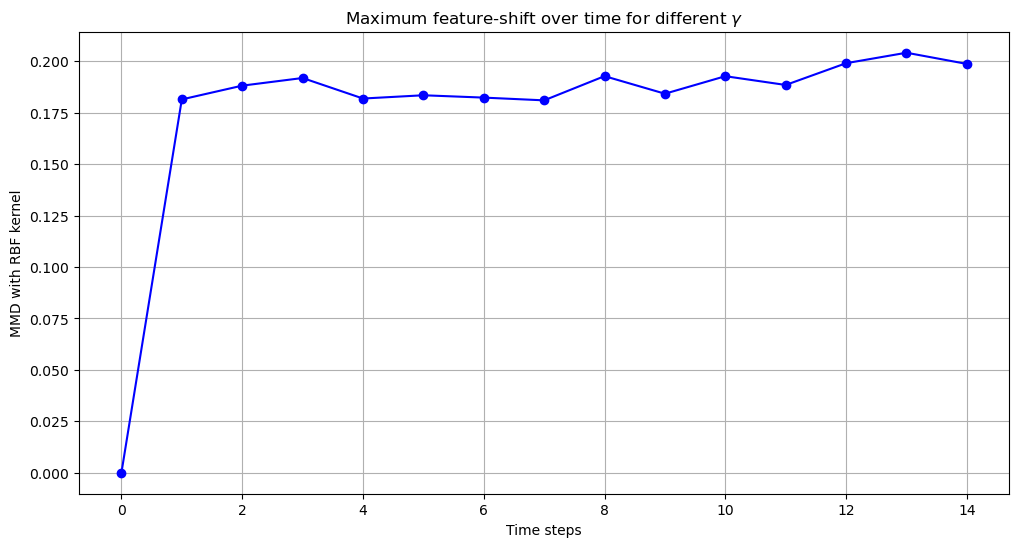

In [6]:
plt.figure(figsize=(12, 6))
plt.title(r'Maximum feature-shift over time for different $\gamma$')

plt.plot(time_steps, mmds, marker='o', linestyle='-', color='b')
plt.xlabel('Time steps')
plt.ylabel('MMD with RBF kernel')
plt.grid(True)
plt.savefig('feature_shift_rbf_max.pdf', format='pdf')
plt.show()
plt.close()